<a href="https://colab.research.google.com/github/jenelaineDC/Master-Time-Series-Analysis-Forecasting/blob/main/Introduction%20to%20Time%20Series/Introduction_to_Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### SETUP ###

In [1]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/Python - Time Series Forecasting/Time Series Analysis/Introduction to Time Series Forecasting

/content/drive/MyDrive/Python - Time Series Forecasting/Time Series Analysis/Introduction to Time Series Forecasting


In [3]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from statsmodels.graphics.tsaplots import month_plot, quarter_plot, plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
# Load Dataset
df = pd.read_csv('bitcoin_price.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [5]:
# Convert "Date" to a datetime object
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [6]:
# Set Date as index
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


### EXPLORATORY DATA ANALYSIS ###

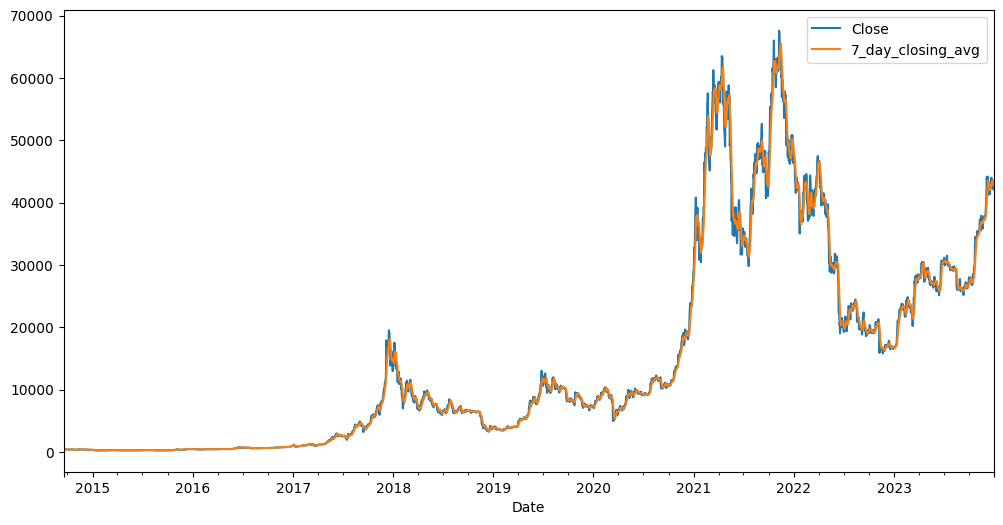

In [9]:
# Generate a 7-day rolling average for the Closing Price
df['7_day_closing_avg'] = df['Close'].rolling(window=7).mean()

# Plot the Close Price and the 7 day rolling average
df[['Close', '7_day_closing_avg']].plot(figsize = (12,6))
plt.show()

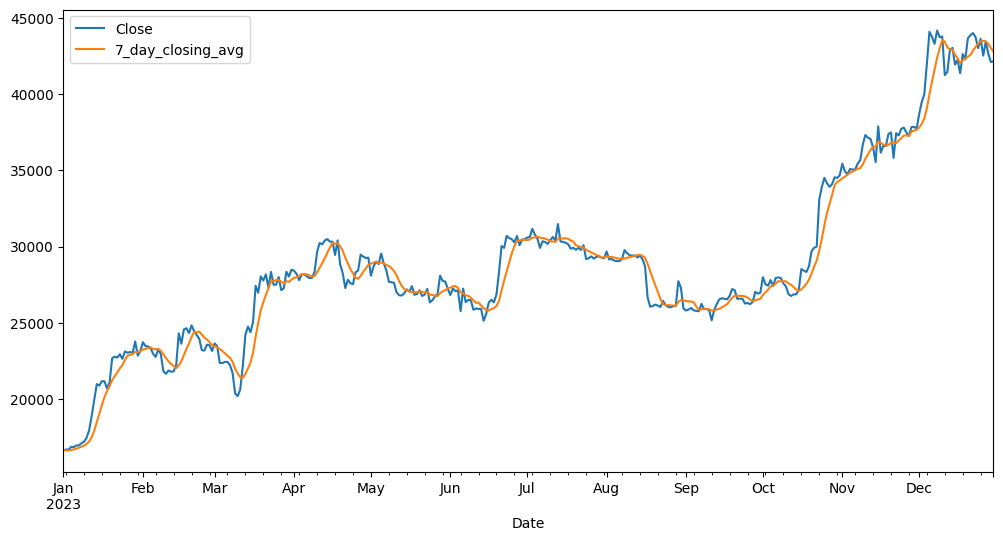

In [10]:
# Zooming in 2023
df[['Close', '7_day_closing_avg']].loc['2023'].plot(figsize = (12,6))
plt.show()

In [11]:
#Find the month with the highest closing average
df.resample('ME').max()['Close'].idxmax()

Timestamp('2021-11-30 00:00:00')

In [12]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,7_day_closing_avg
Date,,,,,,,
2023-12-26,43599.847656,43603.175781,41676.488281,42520.402344,42520.402344,30026850982,43486.929688
2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,43442.855469,25260941032,43457.016183
2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014,43279.688058
2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344,42099.402344,26000021055,43008.473772
2023-12-30,42091.753906,42584.125000,41556.226562,42156.902344,42156.902344,16013925945,42782.382254


In [13]:
# Compute the percentage change for the close variable
df['daily_returns_100%'] = df['Close'].pct_change() * 100
df['daily_returns_100%']

,daily_returns_100%
Date,
2014-09-17,NaN
2014-09-18,-7.192558
2014-09-19,-6.984265
2014-09-20,3.573492
2014-09-21,-2.465854
...,...
2023-12-26,-2.505525
2023-12-27,2.169436
2023-12-28,-1.876028


In [14]:
# Checking which days had more than 10% change in price
df[abs(df['daily_returns_100%']) > 10]

,Open,High,Low,Close,Adj Close,Volume,7_day_closing_avg,daily_returns_100%
Date,,,,,,,,
2014-11-12,367.984985,429.717987,367.984985,423.561005,423.561005,45783200,365.519579,15.193570
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400,310.171718,-10.776686
2015-01-13,267.394012,268.277008,219.906006,225.860992,225.860992,72843904,271.743853,-15.659308
2015-01-14,223.893997,223.893997,171.509995,178.102997,178.102997,97638704,255.138994,-21.144862
2015-01-15,176.897003,229.067001,176.897003,209.843994,209.843994,81773504,244.638280,17.821709
...,...,...,...,...,...,...,...,...
2022-09-09,19328.140625,21439.410156,19310.962891,21381.152344,21381.152344,48469528171,19781.450056,10.612188
2022-11-08,20600.671875,20664.607422,17603.544922,18541.271484,18541.271484,118992465607,20409.998326,-10.006132
2022-11-09,18543.761719,18590.458984,15682.692383,15880.780273,15880.780273,102905151606,19798.752093,-14.349022


### DATA VISUALIZATION ###

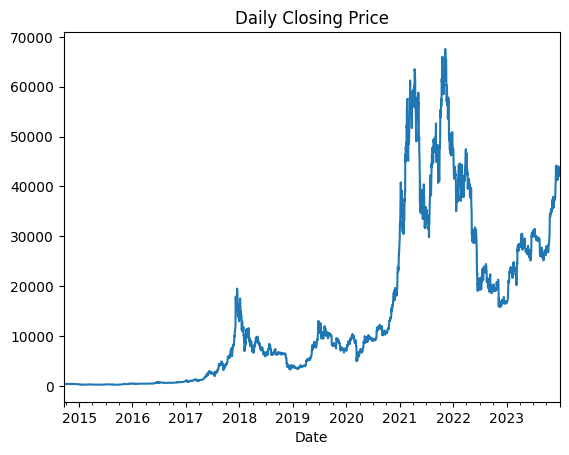

In [15]:
# Daily Closing Price Plot
df['Close'].plot(title = 'Daily Closing Price')
plt.show()

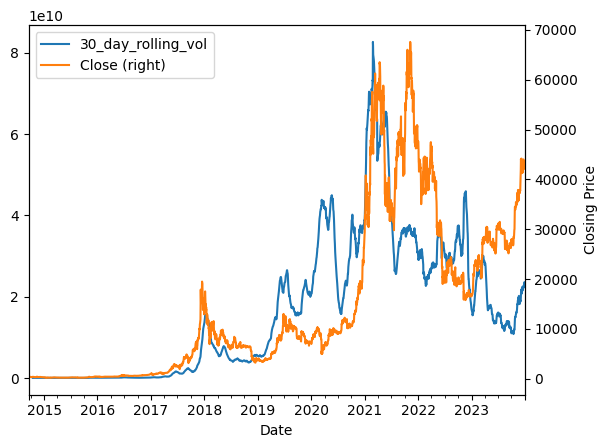

In [16]:
# Create a varaible for the 30 day rolling average
df['30_day_rolling_vol'] = df['Volume'].rolling(window = 30).mean()

# Plot the Closing Price and the 30 day rolling volume
df['30_day_rolling_vol'].plot(legend = True)
ax = df['Close'].plot(secondary_y = True, legend = True)
ax.set_ylabel('Closing Price')
plt.show()

In [17]:
# Perform correlation between closing price and 30 day rolling volume
df[['Close', '30_day_rolling_vol']].corr()

,Close,30_day_rolling_vol
Close,1.000000,0.750445
30_day_rolling_vol,0.750445,1.000000


However, this is Pearson Correlation which often is not ideal for Time Series. You might want to check Spearman Correlation

### DATA MANIPULATION ###

In [18]:
# Identify missing values
df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
7_day_closing_avg,6
daily_returns_100%,1
30_day_rolling_vol,29


In [19]:
# Fill the missing values with the next observation
df['30_day_rolling_vol'] = df['30_day_rolling_vol'].bfill()
#bfill() backward fill
#ffill() forward fill

In [20]:
# Interpolate values
df['7_day_closing_avg'] = df['7_day_closing_avg'].interpolate(method = 'linear')

In [21]:
# Fetch the index
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['weekday'] = df.index.day_name()
df['weekday_numeric'] = df.index.weekday

# Set a varaible for weekend
df['is_weekend'] = df['weekday_numeric'].isin([5,6]).astype(int)

df.head()


,Open,High,Low,Close,Adj Close,Volume,7_day_closing_avg,daily_returns_100%,30_day_rolling_vol,year,month,day,day_of_week,weekday,weekday_numeric,is_weekend
Date,,,,,,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,NaN,3.624856e+07,2014,9,17,2,Wednesday,2,0
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN,-7.192558,3.624856e+07,2014,9,18,3,Thursday,3,0
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,NaN,-6.984265,3.624856e+07,2014,9,19,4,Friday,4,0
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,NaN,3.573492,3.624856e+07,2014,9,20,5,Saturday,5,1
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,NaN,-2.465854,3.624856e+07,2014,9,21,6,Sunday,6,1


In [22]:
# Feature Engineering - Lagged Variables
df['lag_1'] = df['Close'].shift(1)
df['lag_2'] = df['Close'].shift(2)
df.head()

,Open,High,Low,Close,Adj Close,Volume,7_day_closing_avg,daily_returns_100%,30_day_rolling_vol,year,month,day,day_of_week,weekday,weekday_numeric,is_weekend,lag_1,lag_2
Date,,,,,,,,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,NaN,3.624856e+07,2014,9,17,2,Wednesday,2,0,NaN,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN,-7.192558,3.624856e+07,2014,9,18,3,Thursday,3,0,457.334015,NaN
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,NaN,-6.984265,3.624856e+07,2014,9,19,4,Friday,4,0,424.440002,457.334015
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,NaN,3.573492,3.624856e+07,2014,9,20,5,Saturday,5,1,394.795990,424.440002
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,NaN,-2.465854,3.624856e+07,2014,9,21,6,Sunday,6,1,408.903992,394.795990


### Seasonality ###

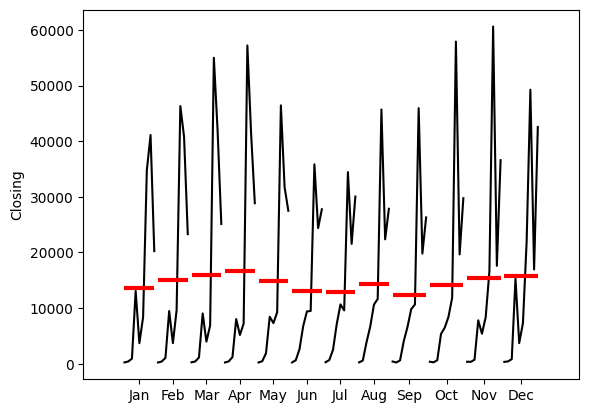

In [23]:
# Monthly Seasonality
month_plot(df['Close'].resample('ME').mean(),
           ylabel = 'Closing')
plt.show()

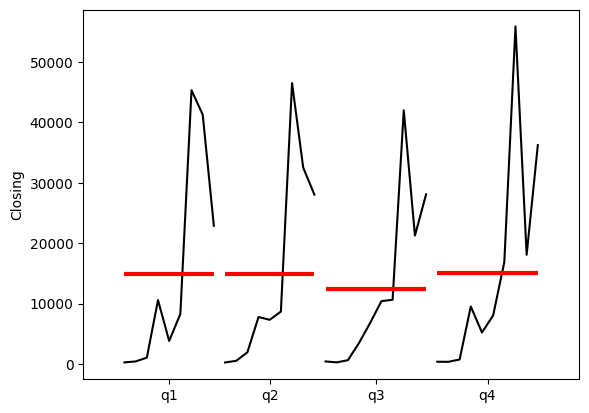

In [24]:
# Quarter Plot
quarter_plot(df['Close'].resample('QE').mean(),
           ylabel = 'Closing')
plt.show()

In [25]:
# Import a second dataset
df_choco = pd.read_csv('choco_monthly_revenue.csv',
                       index_col = "Month with Year",
                       parse_dates= True)
df_choco.head()

,revenue
Month with Year,
2018-01-01,1458
2018-02-01,1102
2018-03-01,1584
2018-04-01,1676
2018-05-01,1461


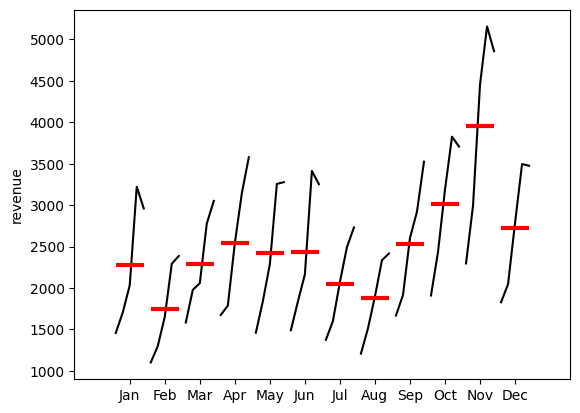

In [26]:
# Month Plot for df_choco
month_plot(df_choco['revenue'],
           ylabel='revenue')
plt.show()

seasonal_decompose, only allows one seasonality.

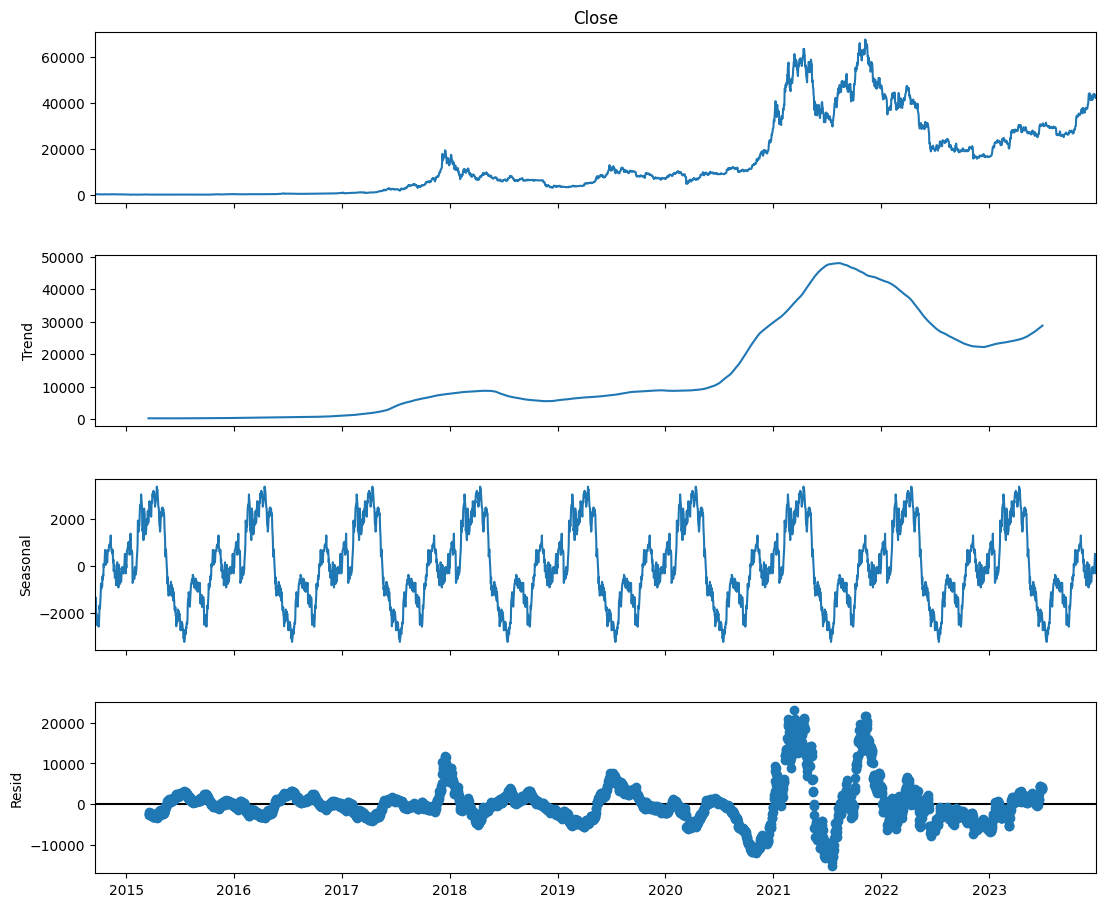

In [27]:
# Seasonal Decomposition
decomposition = seasonal_decompose(df['Close'],
                                   model = 'additive',
                                   period = 365)
fig = decomposition.plot()
fig.set_size_inches(12, 10)
plt.show()

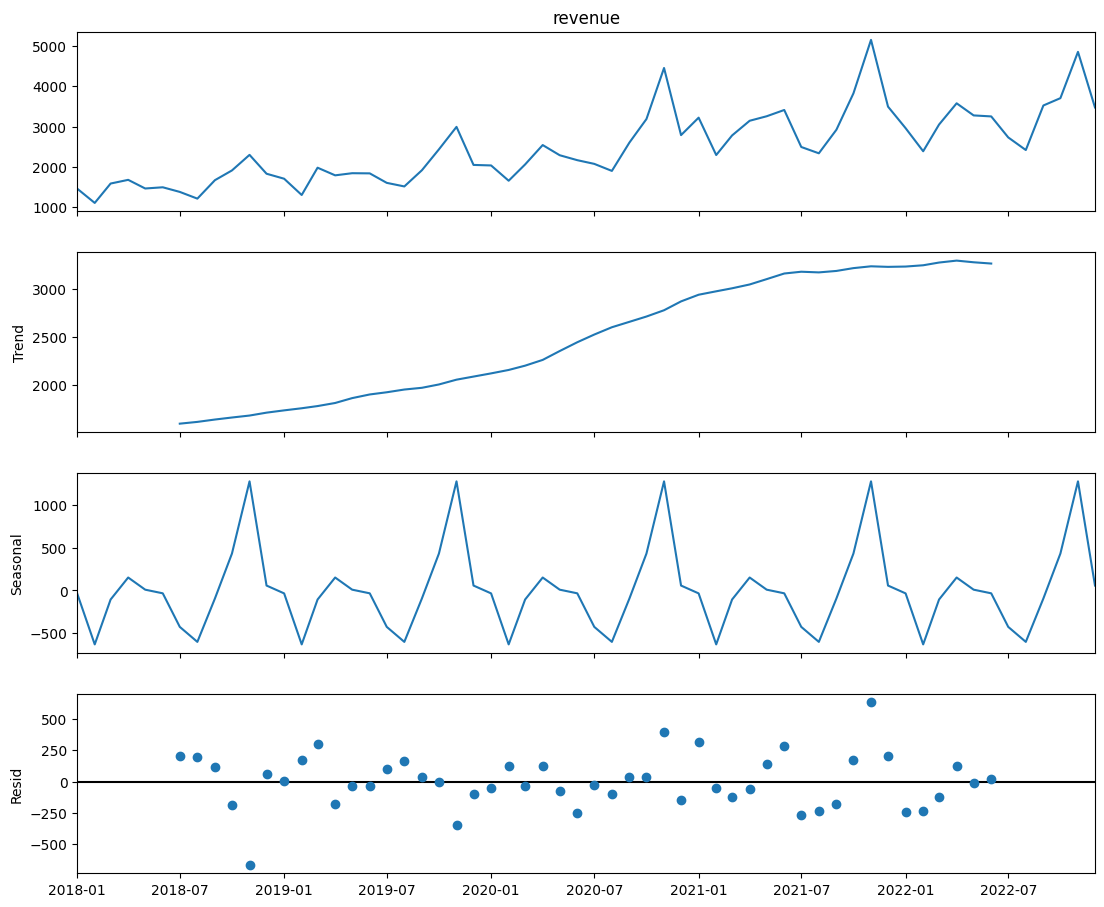

In [28]:
# Seasonality for df_choco
decomposition = seasonal_decompose(df_choco['revenue'],
                                   model = 'additive',
                                   period = 12)
fig = decomposition.plot()
fig.set_size_inches(12, 10)
plt.show()

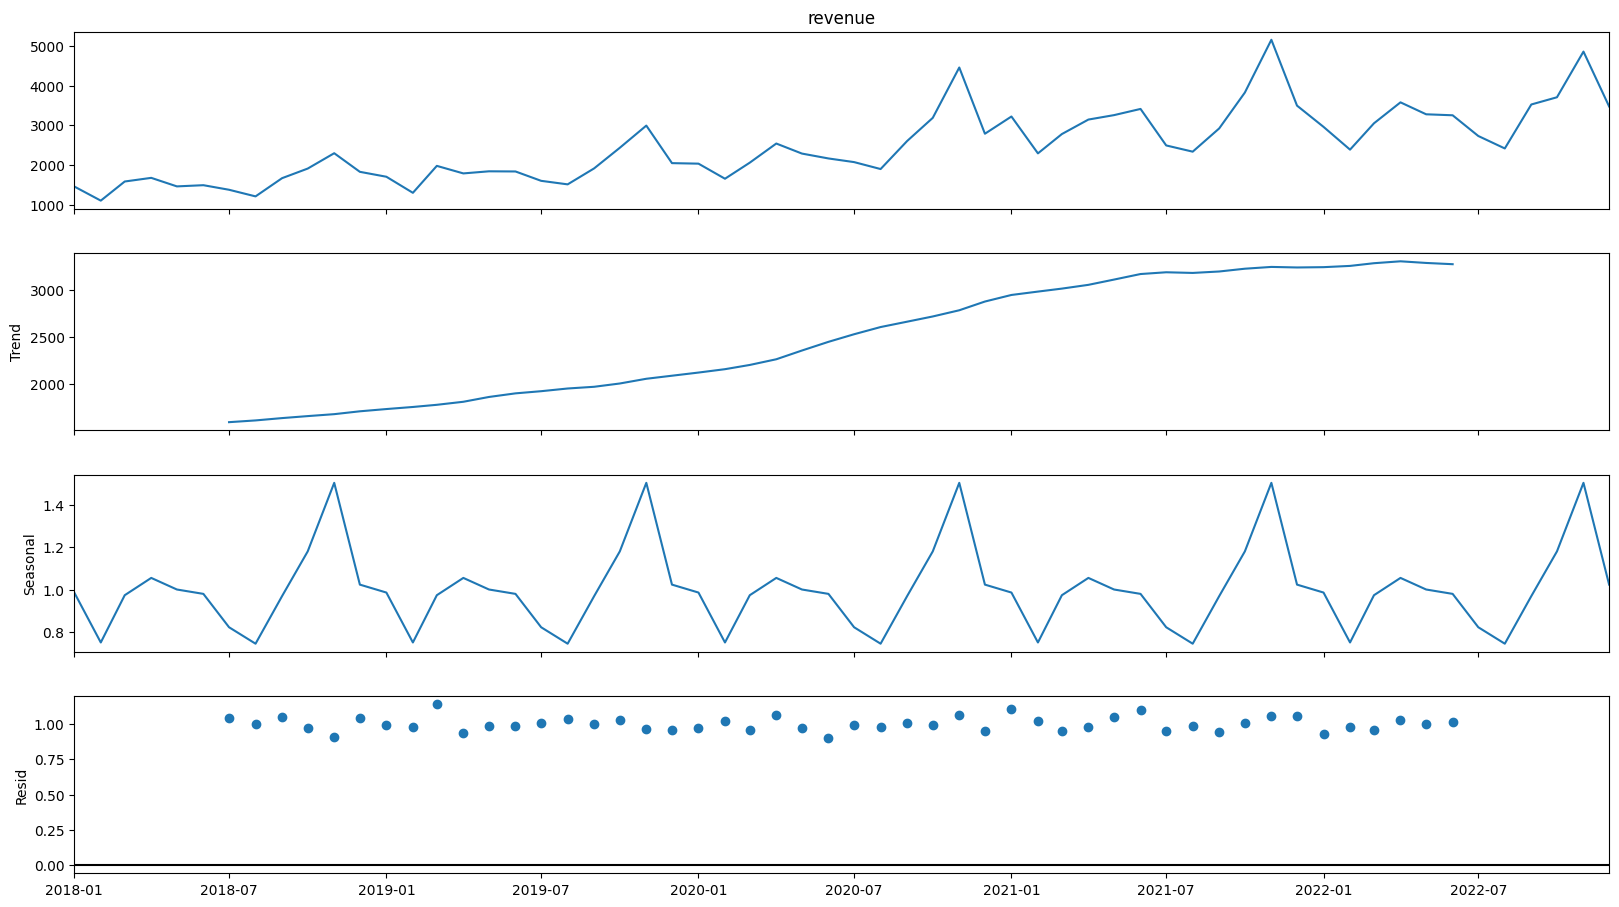

In [29]:
# Seasonality for df_choco using "MULTIPLICATIVE MODEL"
# Based on previous plot, our values tends to increase overtime
# making multiplicative more appropriate
decomposition = seasonal_decompose(df_choco['revenue'],
                                   model = 'multiplicative',
                                   period = 12)
fig = decomposition.plot()
fig.set_size_inches(18, 10)
plt.show()

### AUTO-CORRELATION ###

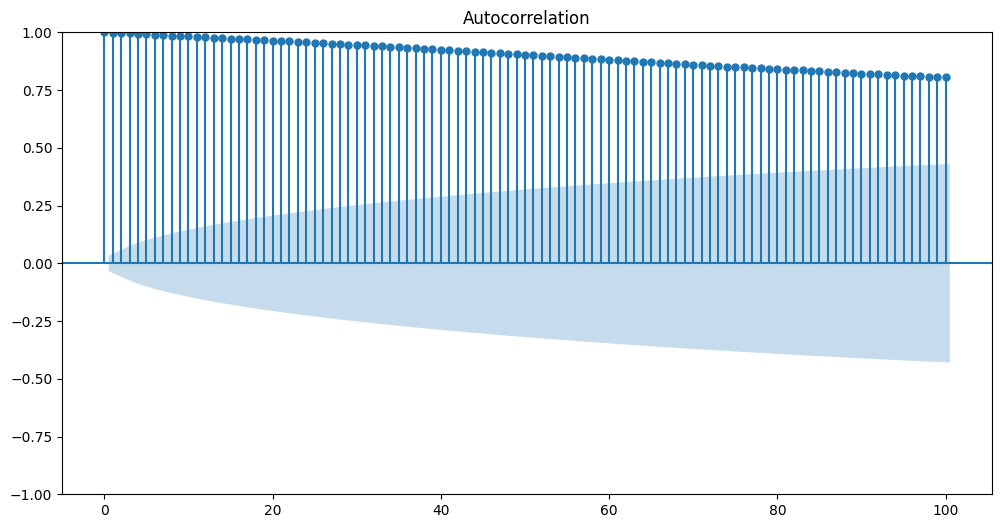

In [30]:
# Plot the ACF of the Bitcoin Adj Close
fig, ax = plt.subplots(figsize = (12,6))
plot_acf(df['Adj Close'], lags = 100, ax = ax)
plt.show()

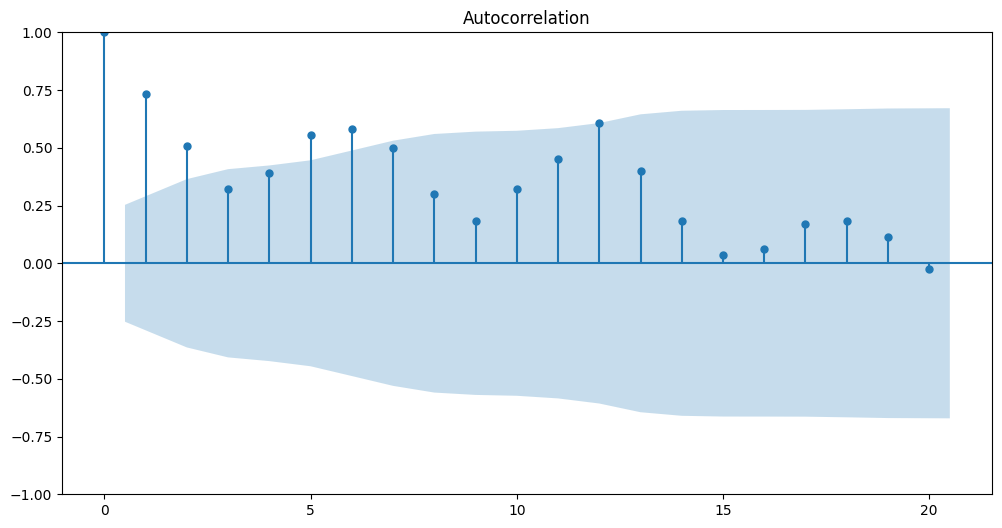

In [31]:
# Plot the ACF of the df_choco Revenue
fig, ax = plt.subplots(figsize = (12,6))
plot_acf(df_choco['revenue'], lags = 20, ax = ax)
plt.show()

### PARTIAL AUTO-CORRELATION ###

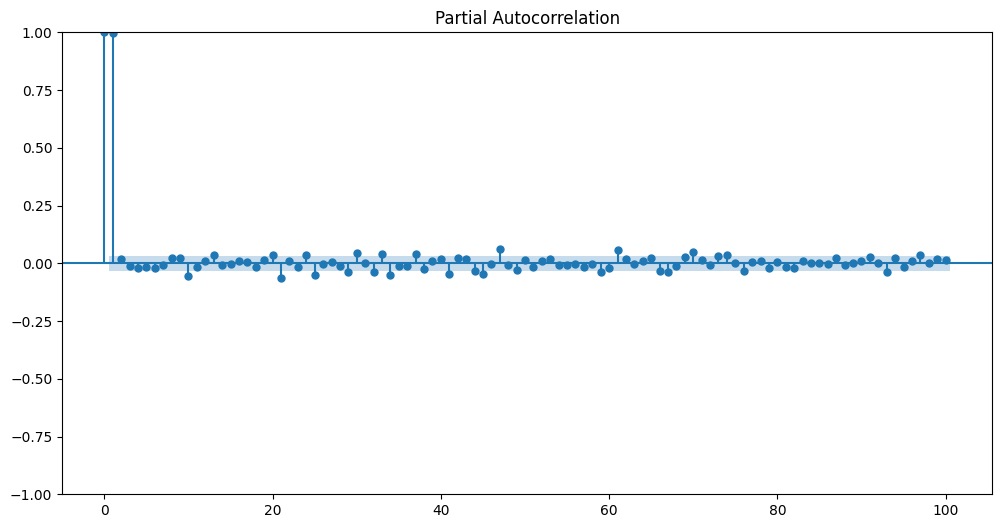

In [32]:
# Plot the PACF of the Bitcoin Adj Close
fig, ax = plt.subplots(figsize = (12,6))
plot_pacf(df['Adj Close'], lags = 100, ax = ax)
plt.show()

Based on the chart above, the only relevant information is what happened the day before

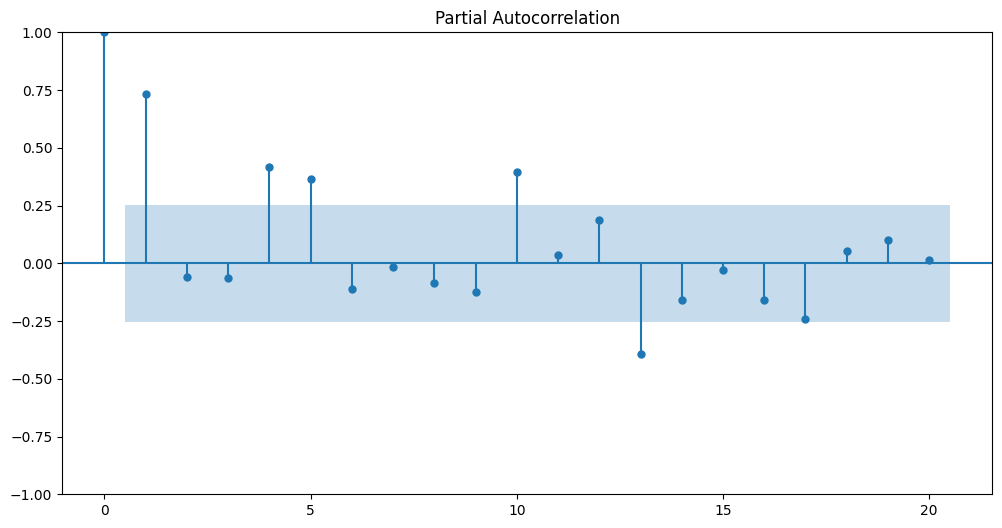

In [33]:
# Plot the PACF of the df_choco Revenue
fig, ax = plt.subplots(figsize = (12,6))
plot_pacf(df_choco['revenue'], lags = 20, ax = ax)
plt.show()

Based on the chart above, it seems that previous month 1, 4, 5, 10 and 13 are important. These are the points exceeding the blue region.